# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Project Objectives

Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook Final Report.

Create modules (wrangle.py) that make your process repeateable and your report (notebook) easier to read and follow.

Ask exploratory questions of your data that will help you understand more about the attributes and drivers of home value. Answer questions through charts and statistical tests.

Construct an timeseries model that predict temp change or future temperature from Greenland.

Make recommendations to a data science team about how to improve predictions.

Be prepared to answer panel questions about your code, process, findings and key takeaways, and model.


# Business Goals:

My goal is to find key driver for temperature change in Greenland

Construct an time series model that predict temperature change or future temp from Greenland.

Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.

Make recommendations on what works or doesn't work in prediction temperature in Greenland.


# Questions:

• Can we predict the future temperature of greenland??

• Whats the highest temperature greenland had??

• Greenland mean temperature??


# Steps:
1-Data acquistion 

2-Preparation

3-Exploratory data analysis 

4-Modeling 

5-Model evaluation

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
import os
import json
from typing import Dict, List, Optional, Union, cast
from IPython.display import display
from ipywidgets import IntProgress
import requests
import pandas as pd
from bs4 import BeautifulSoup
import acquire
import time
from requests import get
from env import github_token, github_username
import matplotlib.pyplot as plt
import seaborn as sns 
import prepare
import numpy as np
import acquire
import Modeling
import unicodedata
import re
import json
from wordcloud import WordCloud

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import acquire
# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
α = .05
alpha= .05
from sklearn.impute import SimpleImputer
#image
from IPython.display import Image
from IPython.core.display import HTML 

# 1)Acquire:

In [2]:
#take a while to acquire new repo everytime from github
df2=acquire.csv_git()

In [3]:
df=acquire.acquire_data()

# Acquire takeaways:

- 

- 

- 

# 2)Prepare/split:

In [4]:
df=prepare.prepare_df(df)

In [5]:
#split the data into train,val,test
train,val,test=prepare.train_validate_test_split(df, 'clean_lang')
train.shape,val.shape,test.shape

((46, 13), (20, 13), (17, 13))

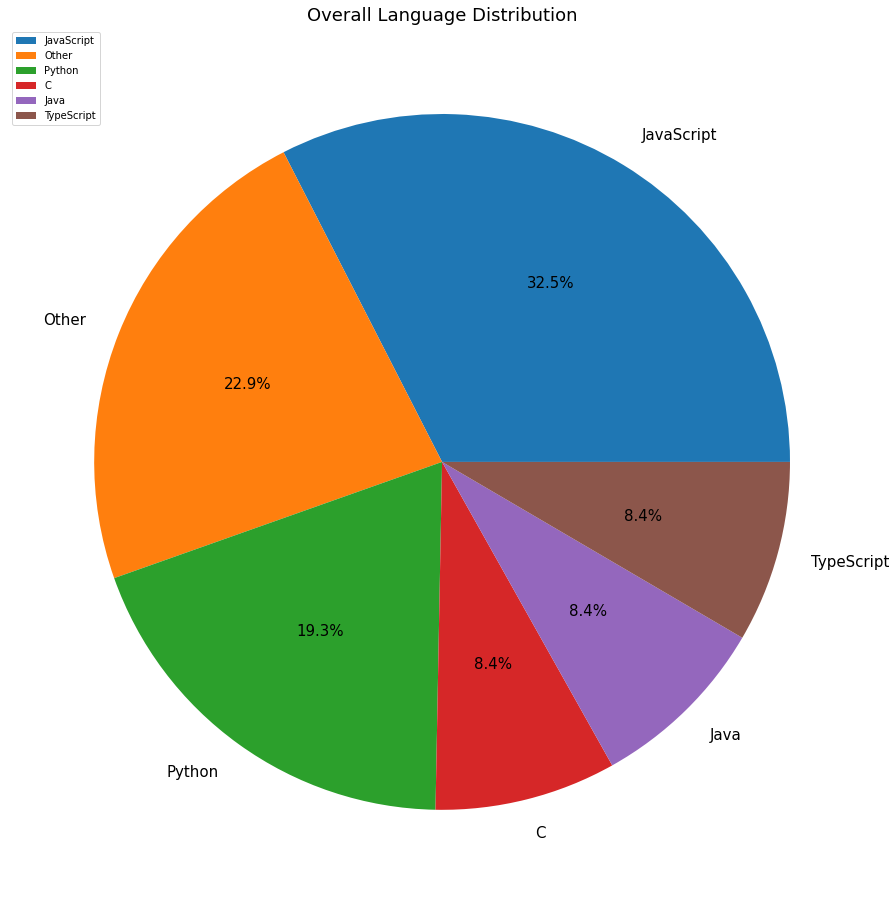

In [6]:
Modeling.pie_chart1(df)

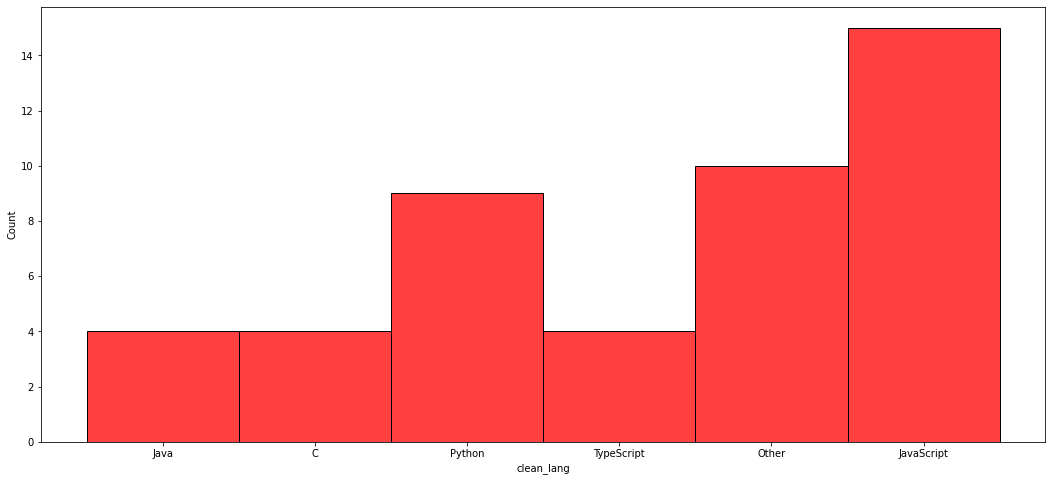

In [7]:
Modeling.pie_chart(train)

# Prepare/split takeaways:

-  Test is 20% of the original dataset, validate is .30*.80= 24% of the original dataset, and train is .70*.80= 56% of the original dataset

- Prepared the data by creating columns 

- 

# Dictianary 
|Attribute|Old keys|        Data type   |       Definition   |
| -------- |-------- | -------- | -------- | 
|repo |repo|object |  temp|
|readme_contents |readme_contents|object |temp
|clean|N/A|object | location |
|stemmed |N/A|object|split into years 
|lemmatized |N/A|object |temp/usa method |
|count_set_lem |N/A |int |temp/usa method|
|clean_lang |N/A |object |date|

# 3)Exploration:

# Hypotheses:

`Hypotheses-1:`

does the amout of unique words vary by language?
.unique() applied to each (not very smart)

`Hypotheses-2:`

does the most common words vary by language

`Hypotheses-3:`

does the length of the repo readme (word amount) vary by language

`Hypotheses-4:`

is the most common words in a readme related to the top 95% of words most common to a language for a majority (boolean class)

`Hypotheses-5:`

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-1:`

Does the amout of unique words vary by language?.unique() applied to each (not very smart)

count_set_lem <-target | clean_lang <-population name | Other <-sample name
We fail to reject the null hypothesis ( Other as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=-1.44434, p=0.16583
----------
count_set_lem <-target | clean_lang <-population name | JavaScript <-sample name
We fail to reject the null hypothesis ( JavaScript as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=0.58041, p=0.56664
----------
count_set_lem <-target | clean_lang <-population name | Python <-sample name
We fail to reject the null hypothesis ( Python as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=-0.22958, p=0.82152
----------
count_set_lem <-target | clean_lang <-population name | C <-sample name
We fail to reject the null hypothesis ( C as a sample has equal mean values to clean_lang as a population regarding Non-Repeating Words ) t=-1.15807, p=0.29084
----

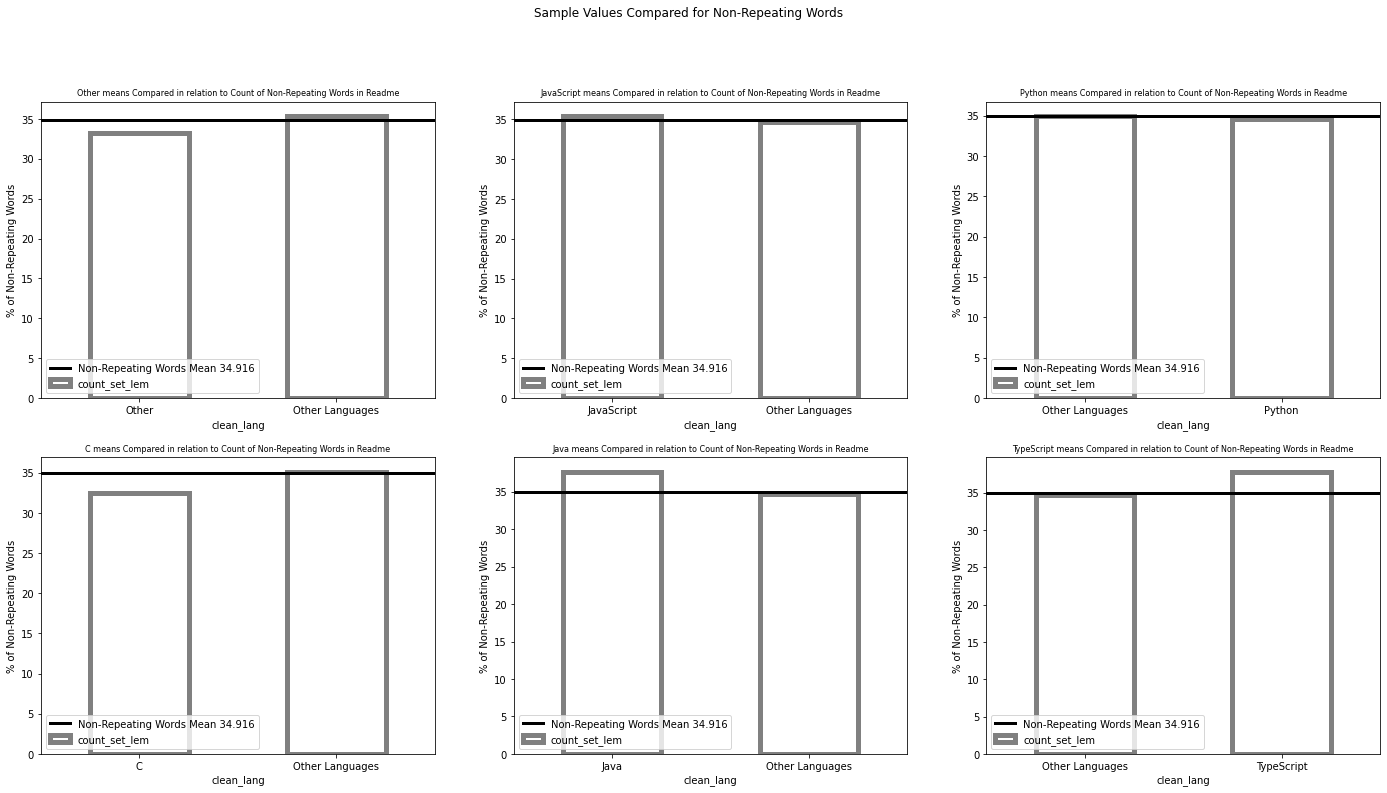

The ones that are similar in value -> ('Other', 'JavaScript', 'Python', 'C') 
The ones not similar in value -> ('Java', 'TypeScript')


In [8]:
Modeling.explore_ttest_lang_setcount(df)

# Takeaways:
- 
- 
- 


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-2:`

does the most common words vary by language

# Takeaways:
- 
- 
- 

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-3:`

does the length of the repo readme (word amount) vary by language

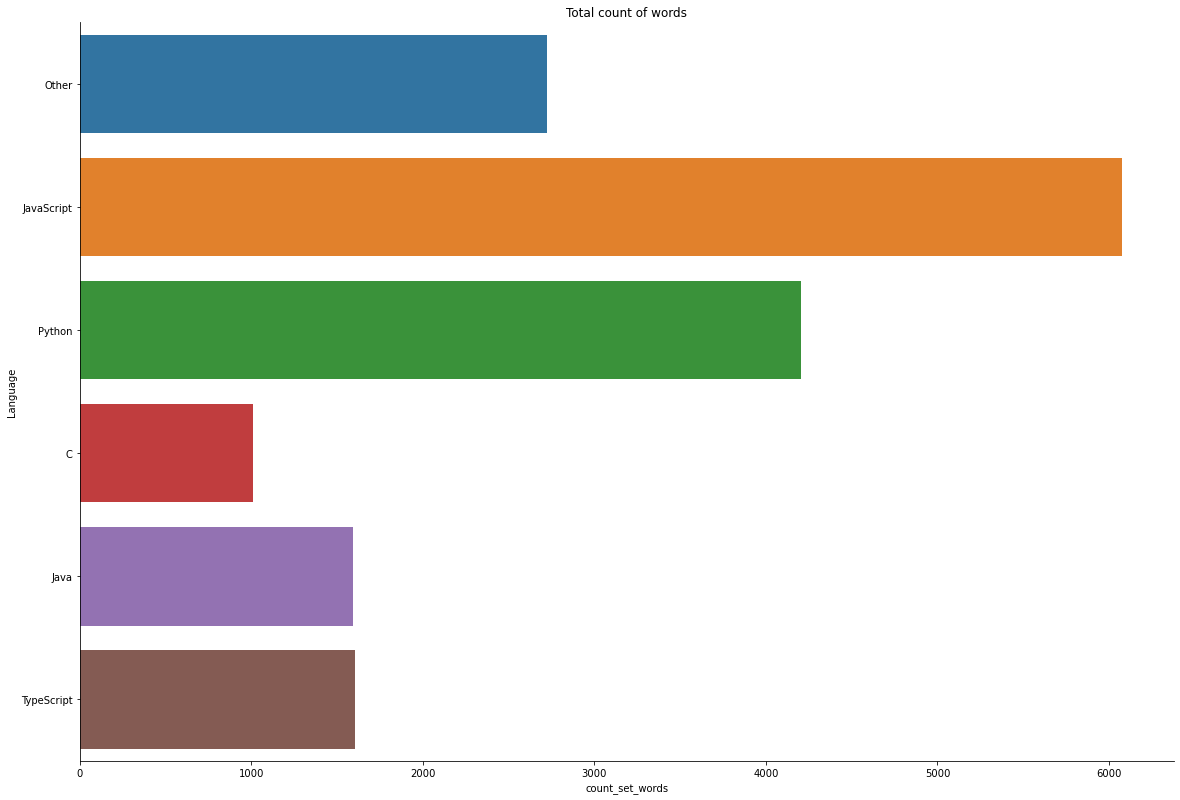

0    2724
1    6073
2    4202
3    1010
4    1593
5    1604
Name: count_set_words, dtype: int64


In [9]:
Modeling.graph2(df)

In [10]:
#stats test:
# Perform 1 sample t-test comparing mean length of stemmed README file per language to the overall average length (all languages)
# Set significance level to 0.05
# stat_test(train, 'word_count')

In [11]:
def stat_test(train, readme_length):
    '''
    Perform 1 sample t-test comparing mean length of original
    README file per language to the overall average length (all languages)
    set the significance level to 0.05
    '''
    alpha = 0.05
    overall_mean_length_readme = train[readme_length].mean()
    for l in train.language.unique():
        sample = train[train.language == l]
        t,p = stats.ttest_1samp(sample[readme_length], overall_mean_length_readme)
        print(l, round(t,5), p<alpha)

# Takeaways:
- 
- 
-  


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-4:`

is the most common words in a readme related to the top 95% of words most common to a language for a majority (boolean class)

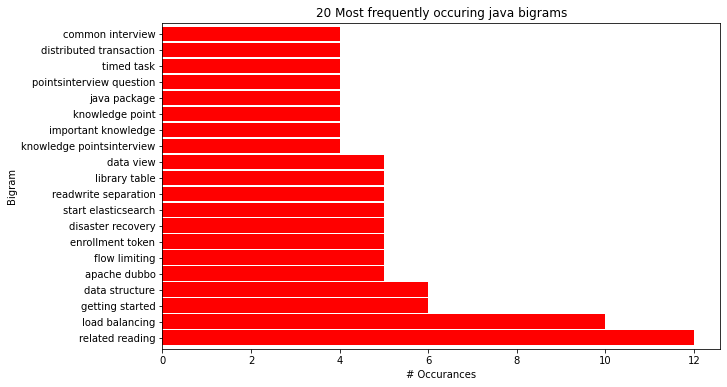

In [12]:
Modeling.java_bigrams(df,train)

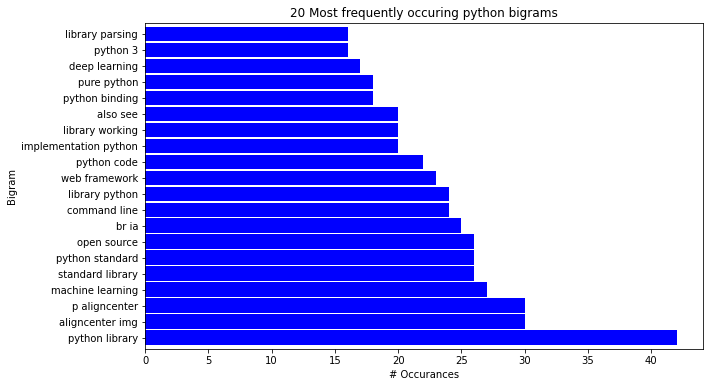

In [13]:
Modeling.Python_bigrams(df,train)

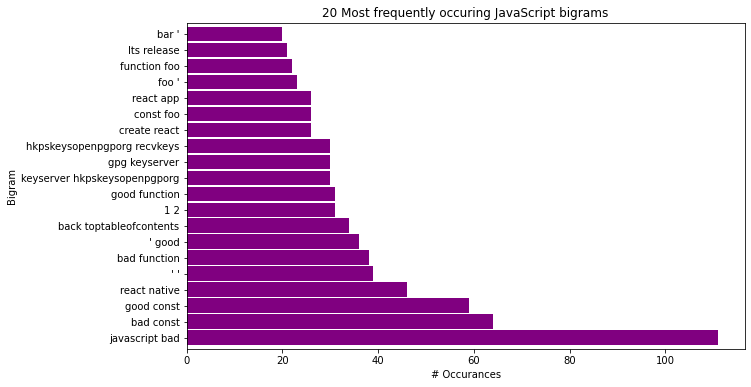

In [15]:
Modeling.JavaScript_bigrams(df,train)

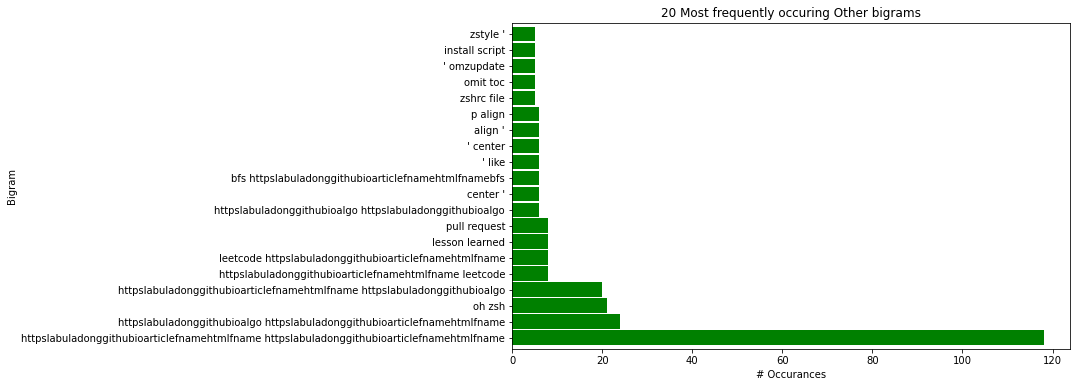

In [16]:
Modeling.other_bigrams(df,train)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>

# `Hypotheses-5:`

# 4)Modeling:

Use selected features or clustered data to predict the target logerror

Algorithms used:

•KNeighborsClassifier()

•RandomForestClassifier(max_depth=10)

•DecisionTreeClassifier at depth(7)

Best model:

•best model is DecisionTreeClassifier at depth(7)

In [17]:
X_train = train.drop(columns=['repo','readme_contents','clean','stemmed','lemmatized','clean_lang'])
y_train = train.clean_lang

X_validate = val.drop(columns=['repo','readme_contents','clean','stemmed','lemmatized','clean_lang'])
y_validate = val.clean_lang

X_test = test.drop(columns=['repo','readme_contents','clean','stemmed','lemmatized','clean_lang'])
y_test = test.clean_lang

In [35]:
def score_models(X_train, y_train, X_validate, y_validate):
    '''
    Score multiple models on train and validate datasets.
    Print classification reports to decide on a model to test.
    Return each trained model, so I can choose one to test.
    models = dt_model1, rf_model, knn1_model.
    '''
    dt_model1 = DecisionTreeClassifier(max_depth = 7, random_state = 123)
    rf_model = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)
    knn1_model = KNeighborsClassifier()
    models = [dt_model1, rf_model, knn1_model]
    for model in models:
        model.fit(X_train, y_train)
        actual_train = y_train
        predicted_train = model.predict(X_train)
        actual_validate = y_validate
        predicted_validate = model.predict(X_validate)
        print(model)
        print('')
        print('train score: ')
        print(classification_report(actual_train, predicted_train))
        print('validate score: ')
        print(classification_report(actual_validate, predicted_validate))
        print('________________________')
        print('')
    return dt_model1, rf_model, knn1_model

In [36]:
#pulling from my model.py for the following functions to work.
#creating 3 different models to conclude whichone is the best one 
dt_model1, rf_model, knn1_model = score_models(X_train, y_train, X_validate, y_validate)

DecisionTreeClassifier(max_depth=7, random_state=123)

train score: 
              precision    recall  f1-score   support

           C       1.00      0.75      0.86         4
        Java       1.00      1.00      1.00         4
  JavaScript       1.00      0.93      0.97        15
       Other       0.83      1.00      0.91        10
      Python       0.89      0.89      0.89         9
  TypeScript       1.00      1.00      1.00         4

    accuracy                           0.93        46
   macro avg       0.95      0.93      0.94        46
weighted avg       0.94      0.93      0.93        46

validate score: 
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         2
        Java       1.00      0.50      0.67         2
  JavaScript       0.67      1.00      0.80         6
       Other       0.50      0.20      0.29         5
      Python       0.50      0.75      0.60         4
  TypeScript       1.00      1.00      1.00   

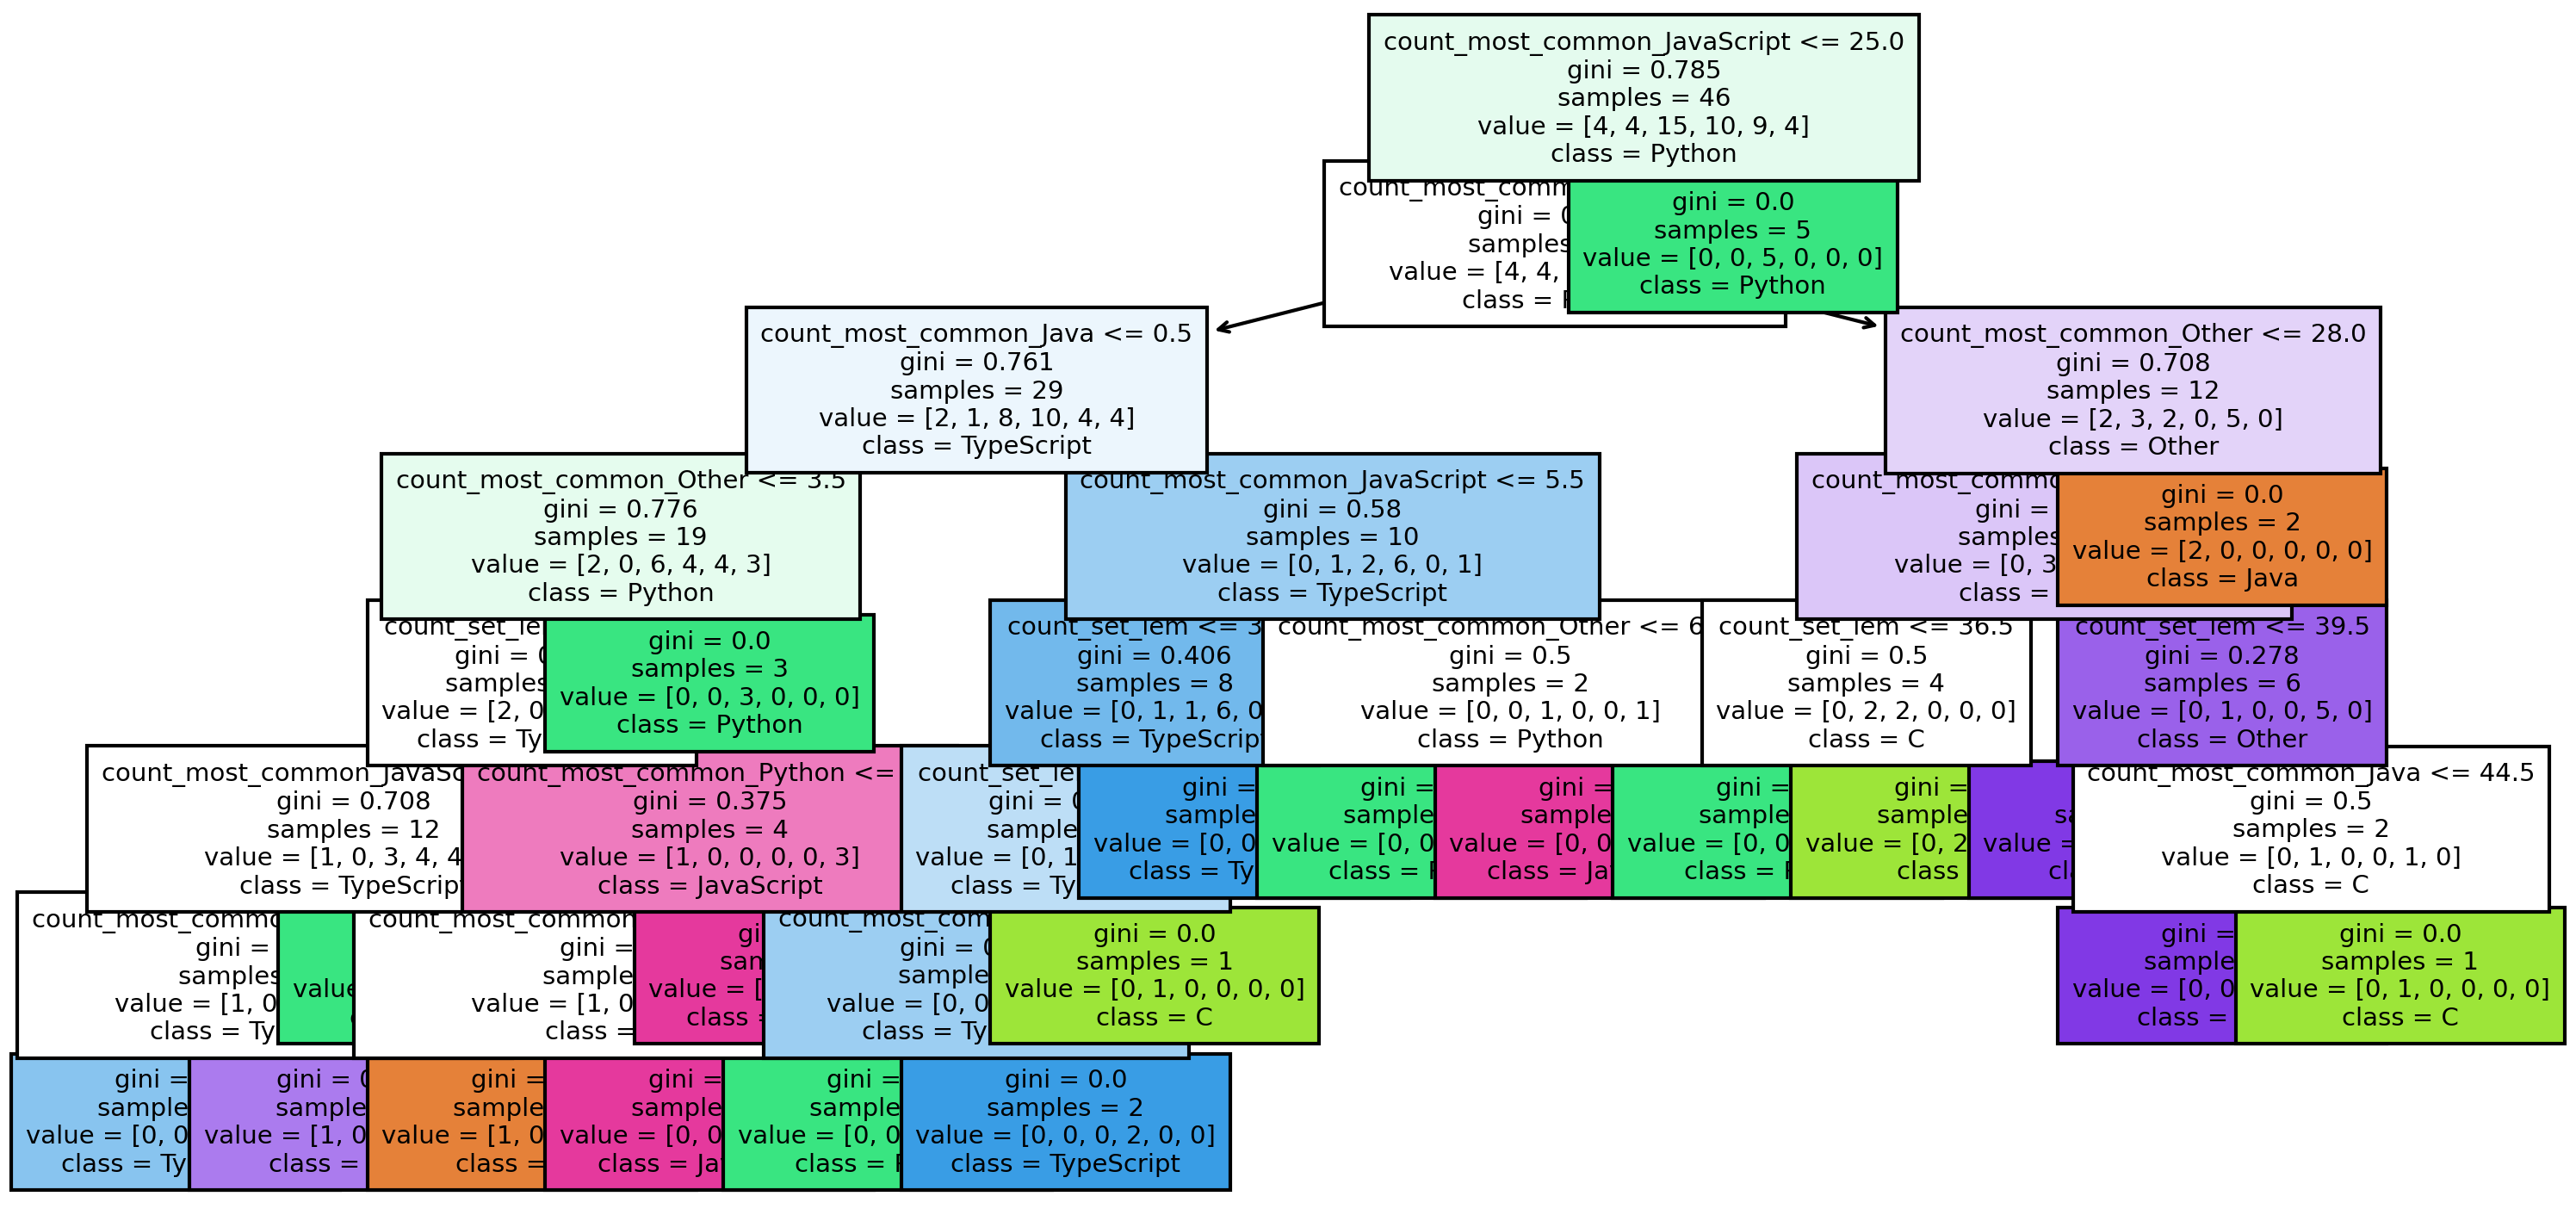

In [38]:
# Create the tree
tree = DecisionTreeClassifier(max_depth=7, random_state=123)

# Fit the model on train
tree = tree.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree.predict(X_train)

# Visualizing the tree
fig, ax = plt.subplots(figsize=(12,6), dpi = 300)
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique(), filled=True, fontsize=7)
plt.show()

In [39]:
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.935
Accuracy of Decision Tree classifier on validate set: 0.600


# Modeling Takeaways:
- 
- 
- 


# 5)Best Model:

• DecisionTreeClassifier perform the best with a f1-score of 90% performing 7 percent better then the baseline.

In [33]:
def best_model(X_test,y_test):
    '''acquiring the best model aka decisiontree testing'''
    #best model we created 
    dt_model1 = DecisionTreeClassifier(max_depth = 7, random_state = 123)
    dt_model1.fit(X_test, y_test)
    actual_test = y_test
    predicted_test = dt_model1.predict(X_test)
    print(classification_report(actual_test, predicted_test))

In [34]:
best_model(X_test,y_test)

              precision    recall  f1-score   support

           C       0.50      1.00      0.67         1
        Java       1.00      1.00      1.00         1
  JavaScript       1.00      1.00      1.00         6
       Other       1.00      0.75      0.86         4
      Python       1.00      1.00      1.00         3
  TypeScript       1.00      1.00      1.00         2

    accuracy                           0.94        17
   macro avg       0.92      0.96      0.92        17
weighted avg       0.97      0.94      0.95        17



# Best Model takeaways:
- 
- 
- 

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Conclusion/Recommnedations/Next Steps:
`Conclusion:`

• We could conclude that Fahrenheit for greenland is very very cold so go live there...

• In conclusion Fahrenheit for Greenland change all seasons but keep the same pathern?

• We could conclude that the Previous year model perform the best with a rmse rate of 30.0

`Recommendations:`

• I recommen that we check if anything happen when the temp got cold if any natural disasters happened.

• We cant change mothernatural but we could predict it at a close percentage. 

`Next Steps:`

• I would love to dive into more country. How different country change in temp. This data has so much potential but i would just be digging myself into a rabbit hole.

# Steps to reproduce finalnotebook:
data set was collected from kaggle(https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)


1)Download the following files 

• Wrangle.py

•'.csv'

• finalnotebook.pynd

2) After downloading files make sure all files are in the same folder or location 

3) Onces step two and step one are done you would be able to run finalnotebook without errors and on your own 